%%html
<center style="font-size: 36px;">
<div style="background-image: url('https://thumbs.dreamstime.com/b/money-business-documents-financial-stock-data-money-business-documents-financial-stock-data-keyboard-105725121.jpg'); background-size: cover; color: black; padding: 20px;">
    <h1>Data Careers and Salaries Exploratory Data Analysis</h1>
    Written by Owen Randolph
</div>
</center>

# Table of Contents

## I. Dataset Information
   - Display Overview
   - Check Missing Values and Data Types
   - Dataset Size
   - Basic Statistics

## II. Data Wrangling
   - Country Names
   - Employment Types
   - Remote Ratio
   - Experience Level

## III. Feature Engineering
   - Inflation Rates
   - Job Categorization

## IV. Univariate Analysis
   - Salary Histogram
   - Job Category Boxplot
   - Experience Level Box Plot
   - Employment Type Bar Chart

## V. Multivariate Analysis
   - Top 10 Employee Location and Job Categories Pivot Table
   - Salary over Time by Job Category Line Graph
   - Salary by Experience Level and Job Type Bar Chart
   - Salary by Job Type and Company Size Bar Chart
   - Work Environment by Company Size Pie Charts
   - Salary by Experience Level by Company Size Bar Chart
   
## VI. Geographic Analysis
   - Salary by Employee Location Choropleth Map
   - Salary by Company Location Bar Chart
   - Top 10 Company Location Salaries, Counts Table
   
## VII. Recommendation

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Dataset Information
</div>

**The dataset we will be exploring has ___11 features___:**

- **work_year:** The year the salary was paid.
- **experience_level:** The experience level in the job during the year.
- **employment_type:** The type of employment for the role.
- **job_title:** The role worked in during the year.
- **salary:** The total gross salary amount paid. 
- **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd:** The salary in USD.
- **employee_residence:** Employee's primary country of residence during the work year as an ISO 3166 country code.
- **remote_ratio:** The overall amount of work done remotely.
- **company_location:** The country of the employer's main office or contracting branch.
- **company_size:** The median number of people that worked for the company during the year.


In [1]:
#Load all libraries needed for this EDA
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualizations
import matplotlib.pylab as plt 
import matplotlib.ticker as mtick
!pip install pycountry
import pycountry

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

  Obtaining dependency information for pycountry from https://files.pythonhosted.org/packages/48/12/fdbcd29b5a243af2f1c1a83636a21e3837aeaa070c9212ebe657e39ce563/pycountry-23.12.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 49.8 MB/s eta 0:00:00
/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


In [2]:
#Read spreadsheet into the notebook
file_name =  'ds_salaries.csv'

try:
    df = pd.read_csv('Users/orand/OneDrive/Data Science Learning/Sample Data')

except:
    df = pd.read_csv('/kaggle/input/2023-data-scientists-salary/' + file_name)

salaries = df

In [3]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
#Check for any missing values
missing_values = salaries.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<div style="background-color: green; color: white; padding: 10px; font-size: 110%;border-radius: 12px;">
   ☝️ We can see that there are 3755 entries in this dataset
</div>

In [6]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

* The minimum salary is 5,132 USD 
* The average salary is 135,570 USD 
* The maximum salary is 450,000 USD

</div>

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Data Wrangling
</div>

In [7]:
#Change country codes to country names for Employee Residence and Company Location
salaries['company_location'] = salaries['company_location'].apply(lambda x: pycountry.countries.get(alpha_2=x).name if pycountry.countries.get(alpha_2=x) else x)
salaries['employee_residence'] = salaries['employee_residence'].apply(lambda x: pycountry.countries.get(alpha_2=x).name if pycountry.countries.get(alpha_2=x) else x)


In [8]:
#Change Employment Type values to words
salaries['employment_type'] = salaries['employment_type'].replace({'FT':'Full Time','CT':'Contract','PT':"Part Time",'FL':'Freelance'})

In [9]:
#Rename Remote Ratio header and clarify values
salaries.rename(columns={'remote_ratio':'work_environment'},inplace=True)
salaries['work_environment'] = salaries['work_environment'].replace({100:'Remote',50:'Hybrid',0:'On Site'})

In [10]:
#Change Experience Level abreviations to words
salaries['experience_level']= salaries['experience_level'].replace({'SE':"Senior","MI":"Mid-level",'EN':"Entry Level",'EX':'Executive'})

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Feature Engineering
</div>

<div style="background-color: darkblue; color: white; padding: 10px; font-size: 110%;border-radius: 12px;">
  📜  To get more accurate salary values over the course of the three years in the dataset, we will standardize the dollar value based on inflation rates: for US salaries, the US inflation rates will be applied; for non-US salaries, the global inflation rate will be applied.
</div>

In [11]:
#Apply inflation rates to the 2020, 2021,and 2022 salaries to make them 2023 dollar value standardized
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return int(adjusted_salary)

# Apply the function to the dataset
salaries['adjusted_salary'] = salaries.apply(adjust_salary, axis=1)

salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_environment,company_location,company_size,adjusted_salary
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L,85847
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S,30000
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S,25500
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M,175000
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M,120000


In [12]:
#Let's see all of these jobs listed and which are the most common in this dataset
mean_salary_by_job_type = salaries.groupby('job_title')['salary_in_usd'].agg(['mean', 'count']).reset_index()

# Rename the columns for clarity
mean_salary_by_job_type.columns = ['job_title', 'Mean Salary', 'Count']
mean_salary_by_job_type['Mean Salary'] = mean_salary_by_job_type['Mean Salary'].astype(int)
mean_salary_by_job_type.set_index('job_title', inplace=True)

# Order job titles by most common to least common
pd.set_option('display.max_rows', None)
mean_salary_by_job_type_sorted = mean_salary_by_job_type.sort_values(by='Count', ascending=False)
mean_salary_by_job_type_sorted

,Mean Salary,Count
job_title,,
Data Engineer,142785,1040
Data Scientist,140869,840
Data Analyst,108716,612
Machine Learning Engineer,154690,289
Analytics Engineer,152368,103
Data Architect,161713,101
Research Scientist,161214,82
Data Science Manager,191278,58
Applied Scientist,190264,58


<div style="background-color: darkblue; color: white; padding: 10px; font-size: 110%;border-radius: 12px;">
📜    Since there are 93 different titles, we can put them into groups to make more salient comparisons and see what we can do.
Let us break these into five categories of jobs: Analysts, Scientists, Engineers, Architects, and Other
</div>


In [13]:
def assign_job_category(job_title):
    keywords = ['Analyst', 'Scientist', 'Engineer', 'Architect']

    for keyword in keywords:
        if keyword in job_title:
            return keyword

    return "Other"

# Applying the assign_job_category function to the 'Job Title' column
salaries['job_category'] = salaries['job_title'].apply(assign_job_category)

In [14]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_environment,company_location,company_size,adjusted_salary,job_category
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L,85847,Scientist
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S,30000,Engineer
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S,25500,Engineer
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M,175000,Scientist
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M,120000,Scientist


<div style="background-color: darkblue; color: white; padding: 10px; font-size: 110%;border-radius: 12px;">
📜Create a new dataframe that only includes Job Titles with Analyst, Scientist, Engineer, or Architect to be used later in Analyses.
</div>

In [15]:
# Define the keywords
keywords = ['Analyst', 'Scientist', 'Engineer', 'Architect']

# Create a new column 'job_category' based on keywords
salaries['job_category'] = salaries['job_title'].apply(lambda title: next((kw for kw in keywords if kw in title), 'Other'))

# Filter the DataFrame to include only rows with valid job categories
salaries_no_other = salaries[salaries['job_category'] != 'Other'].copy()

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Univariate Analysis
</div>

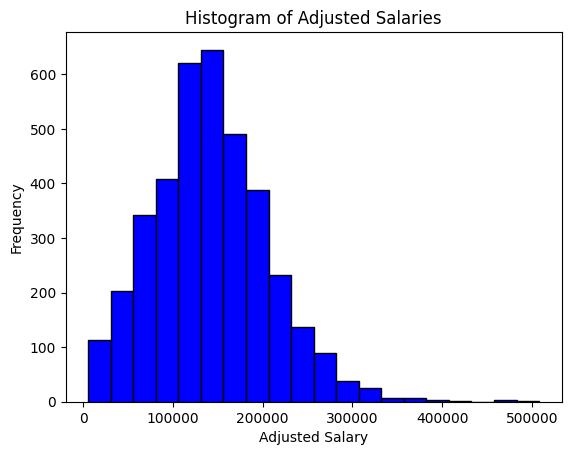

In [16]:
#Histogram showing a distribution of the salaries
plt.hist(salaries['adjusted_salary'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Salaries')

plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">
☝️
The distribution is somewhat normal, but a select few earn very high salaries, likely leadership positions.  The most typical salary is from 100,000 USD and 150,000 USD.

</div>

Median salary for Analyst: 106500.00
Median salary for Other: 140000.00
Median salary for Engineer: 143775.00
Median salary for Scientist: 150000.00
Median salary for Architect: 160000.00


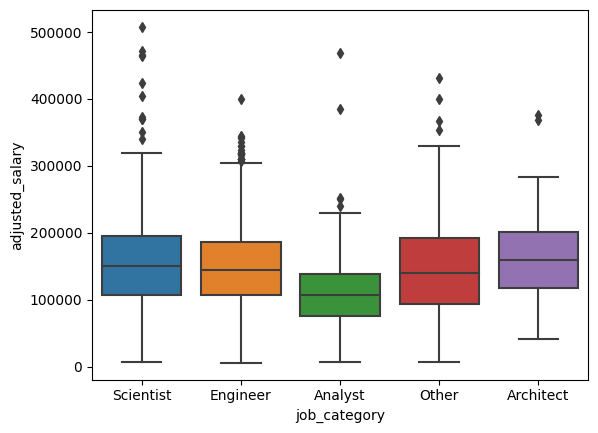

In [17]:
#Compare salary at different levels of experience
# Box plot
sns.boxplot(x='job_category', y='adjusted_salary', data=salaries)

# Calculate medians for each job category
medians = salaries.groupby('job_category')['adjusted_salary'].median()

# Order job categories from lowest to highest median
sorted_job_order = medians.sort_values(ascending=True).index

# Print the medians
for job_category in sorted_job_order:
    median_salary = medians[job_category]
    print(f'Median salary for {job_category}: {median_salary:.2f}')

# Show the plot
plt.show()


<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Analysts clearly earn the least on average and Architects earn the most on average, with the other four being relatively similar. 
    
</div>
 

Median salary for Entry Level: 80000.00
Median salary for Mid-level: 100000.00
Median salary for Senior: 148000.00
Median salary for Executive: 200000.00


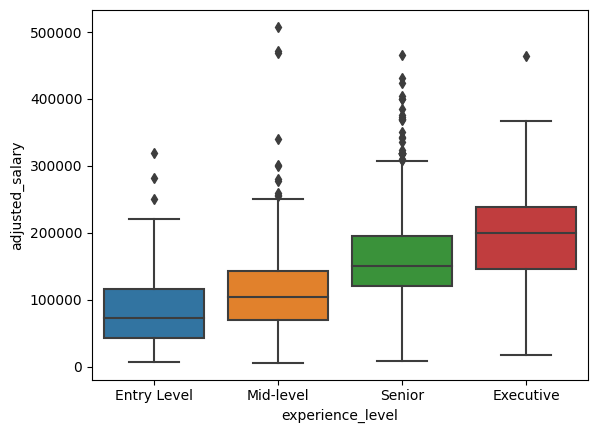

In [18]:
category_order = ['Entry Level','Mid-level','Senior','Executive']
sns.boxplot(y='adjusted_salary', x='experience_level', data=salaries, order=category_order)

medians = salaries.groupby('experience_level')['salary'].median()

# Order experience levels from lowest to highest median
sorted_experience_order = medians.sort_values(ascending=True).index

# Print the medians
for experience_level in sorted_experience_order:
    median_salary1 = medians[experience_level]
    print(f'Median salary for {experience_level}: {median_salary1:.2f}')

In [19]:
#print highest paid employee
highest_salary = salaries['adjusted_salary'].max()
highest_paid_job = salaries[salaries['adjusted_salary'] == highest_salary]
print("The highest paid employee is a: ", highest_paid_job['job_title'])

The highest paid employee is a:  3522    Research Scientist
Name: job_title, dtype: object



<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️It's no surprise that as experience increases, salaries follow suit.  Interestingly, the highest paid position in this study is awarded to a mid-level research scientist employee.
    
</div>

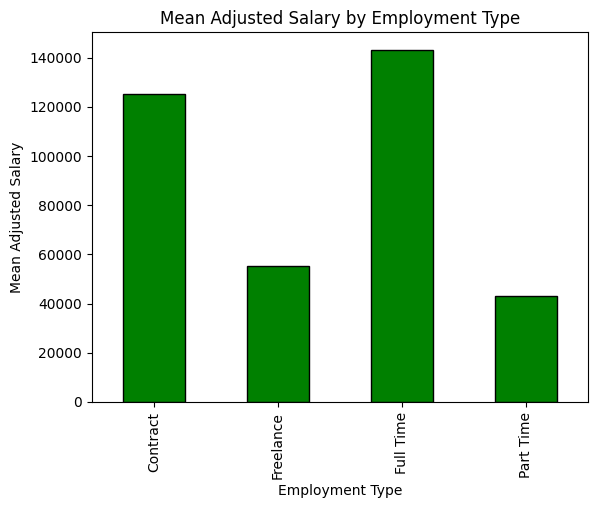

In [20]:
mean_salaries = salaries.groupby('employment_type')['adjusted_salary'].mean()

# Plotting the bar chart
mean_salaries.plot(kind='bar', color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Employment Type')
plt.ylabel('Mean Adjusted Salary')
plt.title('Mean Adjusted Salary by Employment Type')

# Display the plot
plt.show()


<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Full Time employees earn an average just over 140,000 USD, with Freelancers and Part Time workers taking home significantly less each year.
    
</div>

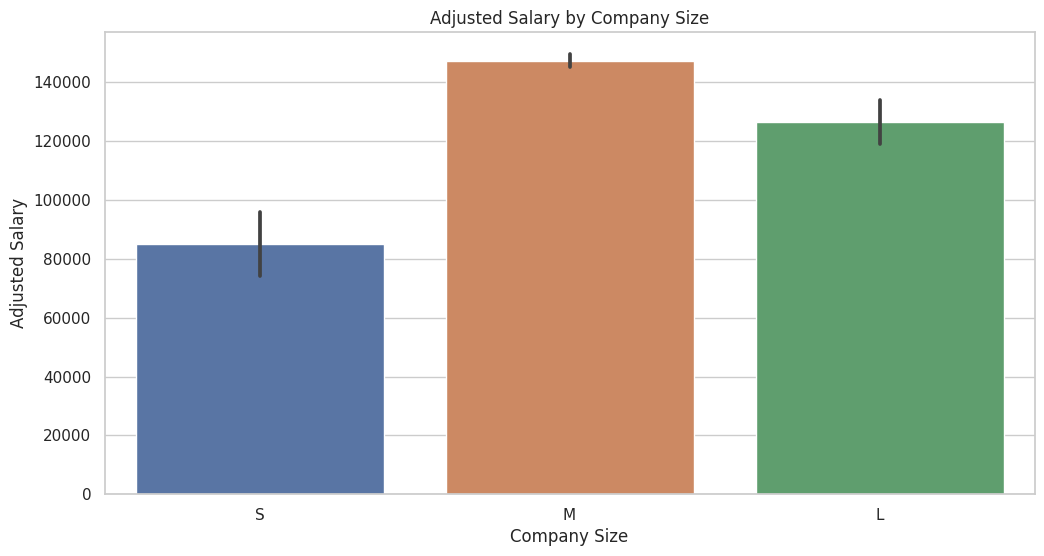

In [21]:
# Bar Chart comparing salaries based on company size
# Define the order of company sizes
company_size_order = ['S', 'M', 'L']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot with the specified order
plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(x="company_size", y="adjusted_salary", data=salaries, order=company_size_order)

# Adding labels and title
plt.xlabel("Company Size")
plt.ylabel("Adjusted Salary")
plt.title("Adjusted Salary by Company Size")

# Show the plot
plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Mid-sized and large companies offer significantly better salaries than small companies.
    
</div>

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Multivariate Analyses
</div>

/tmp/ipykernel_18/2140368149.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, data=salaries_no_other, ci=None, order=order_size)


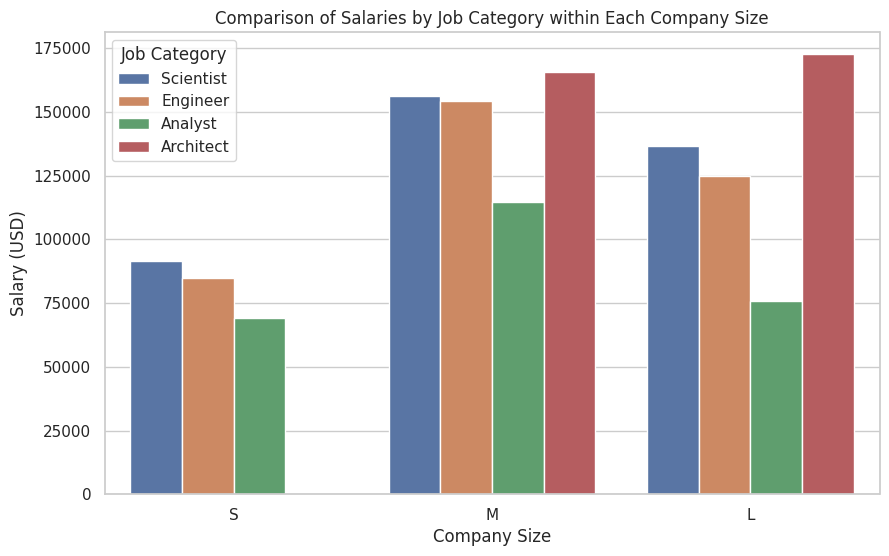

In [22]:
sns.set(style="whitegrid")

order_size = ["S", "M", "L"]

# Select the relevant variables
x_variable = 'company_size'
hue_variable = 'job_category'
y_variable = 'adjusted_salary'

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, data=salaries_no_other, ci=None, order=order_size)

# Customize the plot
plt.title('Comparison of Salaries by Job Category within Each Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.legend(title='Job Category', title_fontsize='12')

# Show the plot
plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️More detail based on the previous bar graph.  We can see large company architects the most, but the other three jobs types at mid-sized companies earn more than mid-sized architects.
    
</div>

/tmp/ipykernel_18/888526968.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line_plot = sns.lineplot(x="work_year", y="adjusted_salary", hue="job_category", data=salaries_no_other, palette="Set1", ci=None)


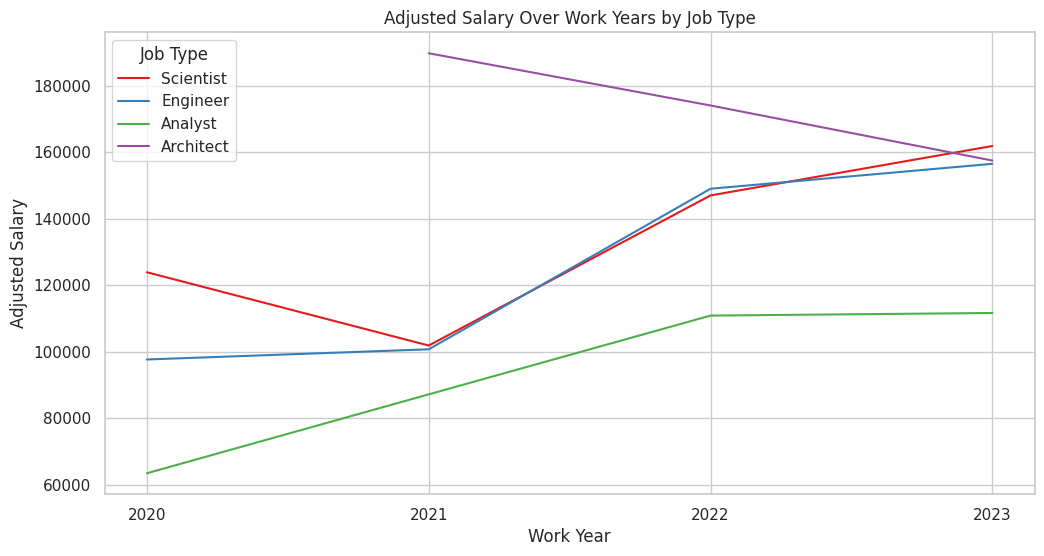

In [23]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot with different colors for each job type (excluding 'Other') and a legend
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x="work_year", y="adjusted_salary", hue="job_category", data=salaries_no_other, palette="Set1", ci=None)

# Adding labels and title
plt.xlabel("Work Year")
plt.ylabel("Adjusted Salary")
plt.title("Adjusted Salary Over Work Years by Job Type")

# Adding legend
plt.legend(title="Job Type")

# Customize x-axis to display only whole years
plt.xticks([int(year) for year in salaries_no_other['work_year'].unique()])

# Show the plot
plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️From 2020 to 2023, the inflation-adjusted salaries for Analysts and Engineers rose the most, while architects were the only job type to see a drop in adjusted salary
    
</div>

<div style="background-color: purple; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

💡It would be interesting to investigate the architect salary data as it is not clear why the decrease occurred here
    
</div>


/tmp/ipykernel_18/2140368149.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, data=salaries_no_other, ci=None, order=order_size)


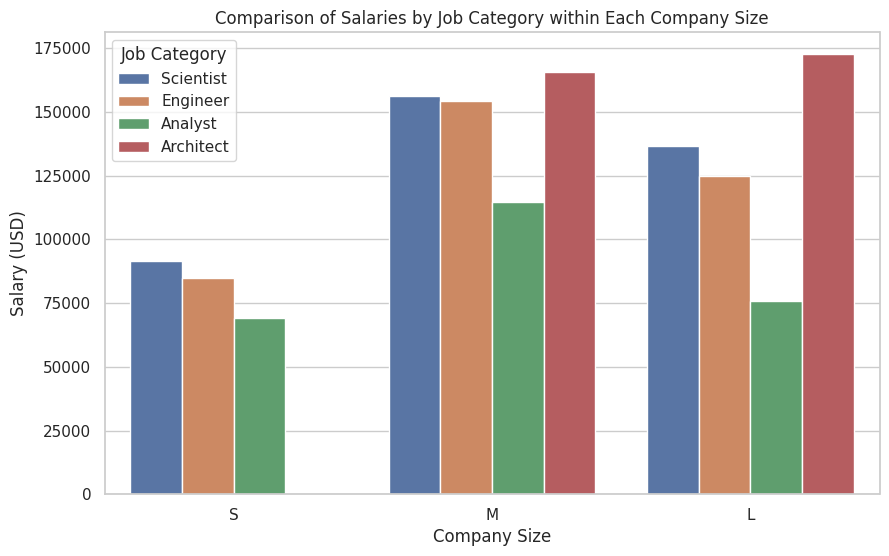

In [24]:
sns.set(style="whitegrid")

order_size = ["S", "M", "L"]

# Select the relevant variables
x_variable = 'company_size'
hue_variable = 'job_category'
y_variable = 'adjusted_salary'

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, data=salaries_no_other, ci=None, order=order_size)

# Customize the plot
plt.title('Comparison of Salaries by Job Category within Each Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.legend(title='Job Category', title_fontsize='12')

# Show the plot
plt.show()

/tmp/ipykernel_18/570015542.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, hue_order=experience_order, data=salaries_no_other, ci=None)


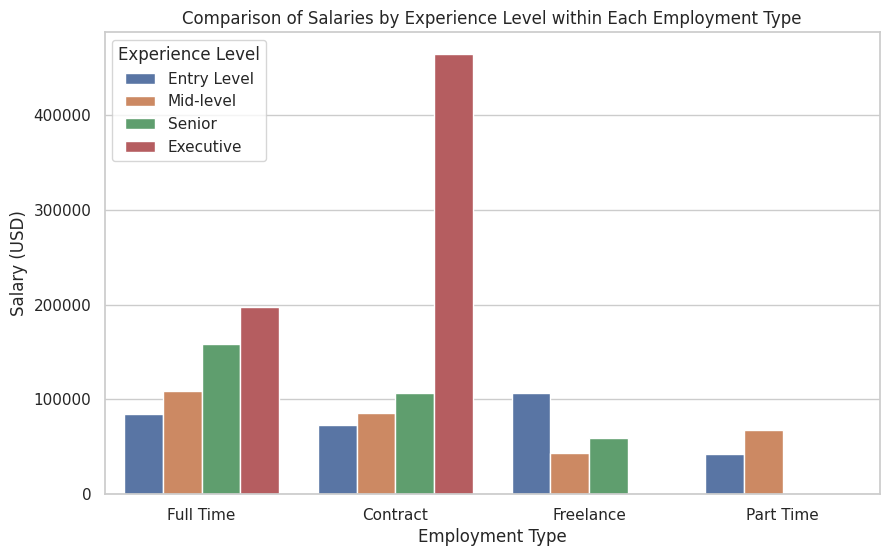

In [25]:
# Set the plotting style
sns.set(style="whitegrid")

experience_order = ['Entry Level', 'Mid-level', 'Senior', 'Executive']

# Select the relevant variables
x_variable = 'employment_type'
hue_variable = 'experience_level'
y_variable = 'adjusted_salary'

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=x_variable, y=y_variable, hue=hue_variable, hue_order=experience_order, data=salaries_no_other, ci=None)

# Customize the plot
plt.title('Comparison of Salaries by Experience Level within Each Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.legend(title='Experience Level', title_fontsize='12')

# Show the plot
plt.show()

<div style="background-color: purple; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

💡The Freelance data shows counter-intuitive data and could be investigated further.
    
</div>

In [26]:
number_of_contract_execs = salaries[(salaries['employment_type'] == 'Contract') & (salaries['experience_level'] == 'Executive')].shape[0]
number_of_contract_execs

1

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️The most noticable outlier, the Contract Executive, is a single person.
    
</div>

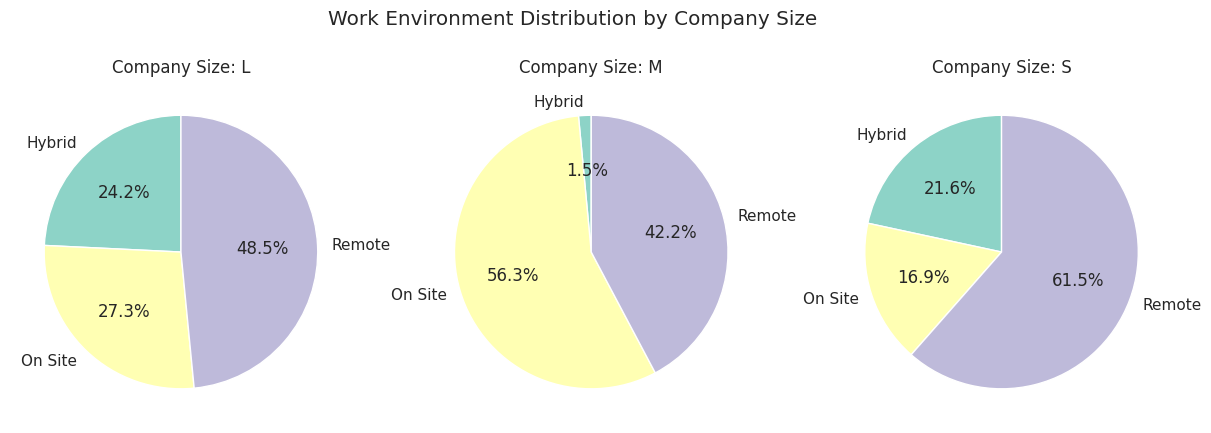

work_environment
On Site    1923
Remote     1643
Hybrid      189
Name: count, dtype: int64


work_environment  company_size
On Site           M               1774
Remote            M               1332
                  L                220
On Site           L                124
Hybrid            L                110
Remote            S                 91
Hybrid            M                 47
                  S                 32
On Site           S                 25
Name: count, dtype: int64

In [27]:
# Calculate percentages within each 'company_size' and normalize to 100%
percentage_df = (salaries.groupby(['company_size', 'work_environment']).size() / len(salaries)).reset_index(name='percentage')
percentage_df['percentage'] *= 100

# Set the plotting style
sns.set(style="whitegrid")

# Create a set of three pie charts
company_sizes = percentage_df['company_size'].unique()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, company_size in enumerate(company_sizes):
    company_size_data = percentage_df[percentage_df['company_size'] == company_size]
    
    # Create a pie chart for each company size
    axes[i].pie(company_size_data['percentage'], labels=company_size_data['work_environment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    axes[i].set_title(f'Company Size: {company_size}')

fig.suptitle('Work Environment Distribution by Company Size')
plt.show()

#Show division of work environments across all company sizes
print(salaries['work_environment'].value_counts())

#Show counts of each work environment for each company size
salaries[['work_environment','company_size']].value_counts()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Small companies tend to offer more remote work, whereas there is more of an on-site requirement for mid-size companies.  
</div>

<div style="background-color: purple; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

💡The unusually small percentage of hybrid workers at mid-sized companies is suspicious and should be looked into further before coming to solid conclusions regarding this data.
Remember mid-sized companies have the highest average salaries.  Further investigation into whether there is a correlation between work environment, company size and salary could be done.  
</div>

/tmp/ipykernel_18/4260524970.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='company_size', y='adjusted_salary', hue='experience_level', data=salaries, palette='viridis', ci=None, order=company_size_order, hue_order=experience_order)


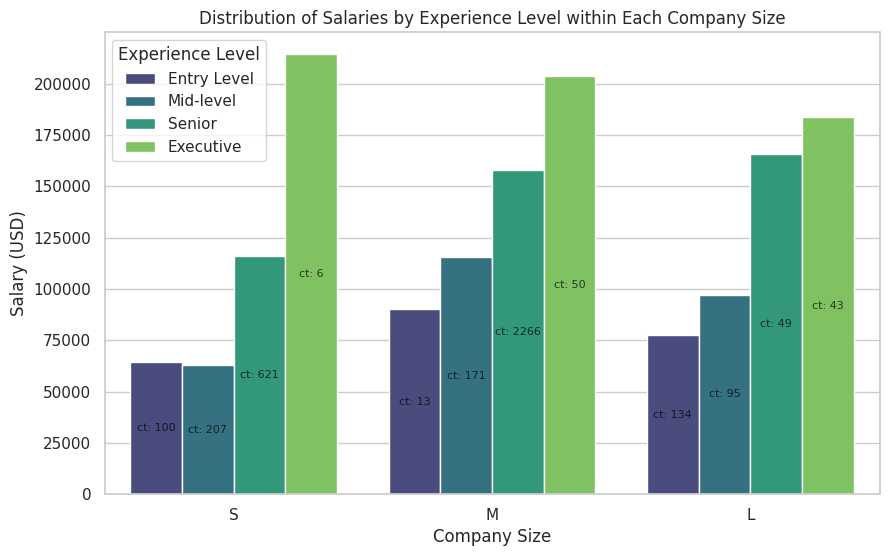

In [28]:
# Define the custom order for experience levels
experience_order = ['Entry Level', 'Mid-level', 'Senior', 'Executive']

# Define the custom order for company sizes
company_size_order = ['S', 'M', 'L']  # Replace with the actual order you want

# Set the plotting style
sns.set(style="whitegrid")

# Create a stacked bar chart with custom order
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='company_size', y='adjusted_salary', hue='experience_level', data=salaries, palette='viridis', ci=None, order=company_size_order, hue_order=experience_order)

# Add counts for each bar inside the bars (total count within each category)
total_counts = salaries.groupby(['company_size', 'experience_level']).size().reset_index(name='total_count')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    total_count = total_counts.iloc[i]['total_count']
    ax.text(x + width/2, y + height/2, f'ct: {total_count}', ha="center", va="center", fontsize=8, color='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Salaries by Experience Level within Each Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.legend(title='Experience Level', title_fontsize='12')

# Show the plot
plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️   As the company size category grows,the mean adjusted salary for execs decreases, but for most other experience levels, the trend is the opposite.
</div>
<div style="background-color: purple; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

💡It would be helpful to acquire more data points for small company executive salaries.
</div>

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Geographic Analysis
</div>

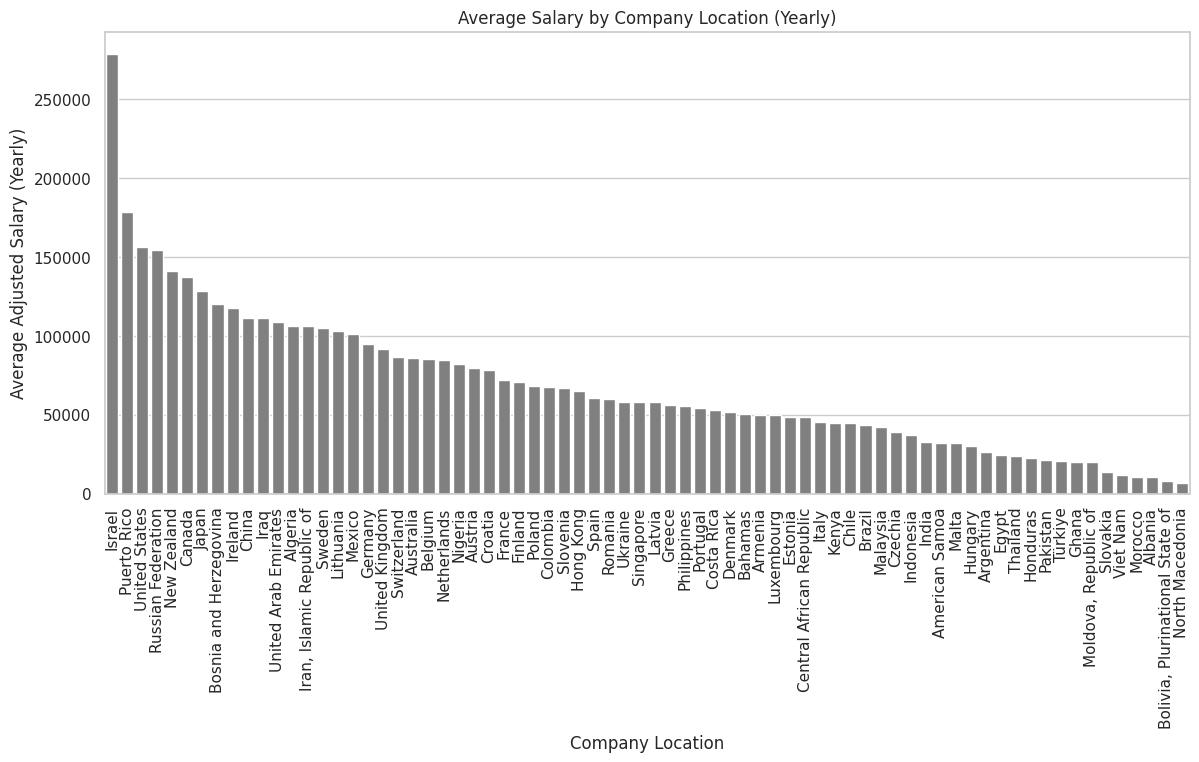

In [29]:
# Average salary by company_location
import plotly.express as px

avg_salary_by_location = salaries.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     range_color=(5000, 160000),
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()

# Average salary by company_location
avg_salary_by_location = salaries.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, color='grey')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Adjusted Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()

<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Israeli companies provide far and away the most generous salaries, with Puerto Rican, American and Russian companies offering the next three most generous.
    It is clear that Western and East Asian-based companies often provide higher salaries than companies in the developing world.
    
</div>
<div style="background-color: purple; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

💡Israel is known for it's highly advanced tech industry.  Puerto Rican companies paying more than their American counterparts is unexpected.
    
</div>

In [30]:
average_salary = salaries.groupby('company_location')['adjusted_salary'].mean().round()

# Creating a DataFrame with the top 10 company locations and their counts
location_counts = salaries['company_location'].value_counts()
top_10_locations = pd.DataFrame({'Company Location': location_counts.head(10).index, 'Count': location_counts.head(10).values})

# Adding the average salary column to the final DataFrame
final_df = top_10_locations.copy()
final_df['Average Salary'] = final_df['Company Location'].map(average_salary)

# Displaying the data as a table
final_df

,Company Location,Count,Average Salary
0,United States,3040,156744.0
1,United Kingdom,172,91842.0
2,Canada,87,137710.0
3,Spain,77,60582.0
4,India,58,32806.0
5,Germany,56,94667.0
6,France,34,72022.0
7,Brazil,15,43377.0
8,Australia,14,85982.0
9,Greece,14,56550.0


<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️With the exception of those based in India, most of the businesses in this dataset are in the West, namely the USA.
    
</div>

In [31]:
# This dataframe will show the Top ten countries by employee residence and show information about salary and job types for each one
# Calculating the average salary for each residence group and rounding to the nearest integer
average_salary = salaries.groupby('employee_residence')['adjusted_salary'].mean().round().astype(int)

# Creating a DataFrame with the top 10 countries and their counts
residence_counts = salaries['employee_residence'].value_counts()
top_10_countries = pd.DataFrame({'Employee Residence': residence_counts.head(10).index, 'Count': residence_counts.head(10).values})

# Adding the average salary column to the final DataFrame
final_df = top_10_countries.copy()
final_df['Average Salary'] = final_df['Employee Residence'].map(average_salary)

# Creating pivot tables for job category counts by country
job_category_counts = salaries.groupby(['employee_residence', 'job_category']).size().reset_index(name='Job Category Count')
pivot_table = job_category_counts.pivot_table(index='employee_residence', columns='job_category', values='Job Category Count', fill_value=0)

# Merging the final DataFrame with the pivot table
final_df = pd.merge(final_df, pivot_table, how='left', left_on='Employee Residence', right_index=True)

# Displaying the data as a table
final_df

,Employee Residence,Count,Average Salary,Analyst,Architect,Engineer,Other,Scientist
0,United States,3004,157740,554,98,1343,184,825
1,United Kingdom,167,91799,29,3,91,8,36
2,Canada,85,137828,18,3,25,11,28
3,Spain,80,63694,19,0,24,1,36
4,India,71,39130,15,1,18,10,27
5,Germany,48,101755,4,0,18,8,18
6,France,38,67123,5,0,11,2,20
7,Portugal,18,56587,1,0,13,1,3
8,Brazil,18,52719,5,0,7,0,6
9,Greece,16,60629,5,0,8,2,1


<div style="background-color: green; color: white; padding: 10px; font-size: 110%; border-radius: 12px;">

☝️Architects mostly live in the United States.
    
</div>

<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
Recommendations
</div>

Numerous insights would enlighten the analyst further on more fully understanding trends revealed in this analysis:

- Continue to acquire more data to add to this set. Less than 4000 subjects can give insights, but the risk of anomalies that may lead the analyst astray is higher with less data.

- Dig deeper into more job categories, for example managers, AI and Machine Learning-focused titles.

- More specific data on experience, for example, the number of years or level of education, would help expand insights and could help with prediction accuracy.


%%html
<center style="font-size: 36px;">
<div style="background-image: url('https://live.staticflickr.com/683/22759686771_733b52eafe_b.jpg'); background-size: cover; color: white; padding: 20px;">
    <h1>Thank You for viewing my Exploratory Data Analysis!</h1>
</div>
</center>